In [1]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [2]:
plt.rcParams.update({'font.size': 20, 'lines.linewidth':10, 'axes.linewidth':4, 'xtick.bottom':False,
                     'ytick.labelsize': 14, 'xtick.labelsize': 17, 
                     'ytick.left': True, 'ytick.major.size': 2, 'ytick.major.width': 0
                    })

In [3]:
alpha_star = 0.1
n_sentences = 6
reviews = np.array([0.2,0.8,0,0,0,0])
news = np.array([0,0,0.32,0.32,0.32,0.04])
p = alpha_star*reviews + (1-alpha_star)*news
mle = p
weight = 1/3
marg = reviews*weight +news*(1-weight)
base = reviews*0.5 + news*0.5
joint = np.ones(n_sentences)/n_sentences

In [4]:
labels = ['Review', 'News', 'MLE', 'Sentence CVaR', 'Naive Topic CVaR', 'Topic CVarR']
titles = ['Training Data', 'Training Data', 'MLE', 'Sentence CVaR', 'Naive Topic CVaR', 'Topic CVarR']
colors = ['steelblue','firebrick'] + ['dimgray',]*4
legends = [False, True, False, False, False, False]
dists = [reviews*alpha_star, news*(1-alpha_star), mle, joint, marg, base]

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


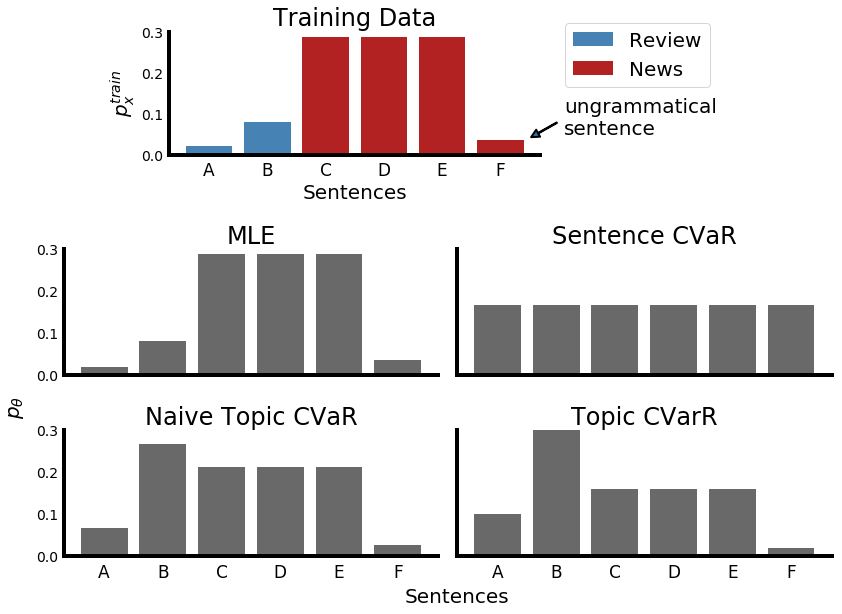

In [5]:
fig = plt.figure(figsize=(12,9),constrained_layout=True)

gs = fig.add_gridspec(2, 1, height_ratios=[1,2.5])
gs0 = gs[0].subgridspec(1, 3, width_ratios=[0.25, 1,0.75])
gs1 = gs[1].subgridspec(2, 2)
panels = [fig.add_subplot(grid) for grid in [gs0[0,1], gs1[0,0],gs1[0,1],gs1[1,0],gs1[1,1]]]
panels = [panels[i] for i in (0,0,1,2,3,4)]
for i, (ax, d, l, c, t, leg) in enumerate(zip(panels, dists, labels, colors, titles, legends)):
    ax.bar(np.arange(n_sentences), d, label=l, color=c)
    ax.set_title(t)
    if i in (3,5):
        ax.set_yticks([])
    if i in (4,5):
        ax.set_xticks(range(6))
        ax.set_xticklabels(['A','B','C','D','E','F',])
    else:
        ax.set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([0,0.3])
    if leg:
        ax.legend(bbox_to_anchor=(1.04,1.15))
style = "Simple,tail_width=0.5,head_width=4,head_length=8"
kw = dict(arrowstyle=style, color="k")
arrow = patches.FancyArrowPatch((n_sentences,0.08), (n_sentences-0.5, 0.04), in_layout=False, clip_on=False,
                                arrowstyle="Simple,tail_width=0.5,head_width=8,head_length=8", linewidth=2)
panels[0].add_patch(arrow)
panels[0].text(n_sentences+0.1, 0.05, 'ungrammatical\nsentence')
panels[0].set_ylabel(r'$p^{train}_x$')
panels[0].set_xticks(range(6))
panels[0].set_xticklabels(['A','B','C','D','E','F',])
panels[0].set_xlabel('Sentences')
panels[2].set_ylabel(r'$p_\theta$', clip_on=False, size=20)
panels[2].yaxis.set_label_coords(-0.1,-0.25)
panels[5].set_xlabel('Sentences', clip_on=False, size=20)
panels[5].xaxis.set_label_coords(-0,-0.25)
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
plt.savefig('../example.pdf')

Sanity Checks

In [6]:
def log_loss(p, pmodel, indices=(None)):
    p = p[indices]
    p = p/ np.sum(p)
    pmodel = pmodel[indices]
    return np.dot(p, -1*np.log(pmodel))

In [7]:
def KL_loss(p, pmodel, indices=(None)):
    p = p[indices]
    p = p/ np.sum(p)
    pmodel = pmodel[indices]
    return np.dot(p, np.log(p)-np.log(pmodel))

In [8]:
def sanity_check(p, pmodel_list, label_list, indices):
    print(f"{' ':<10}\t{'log-likelihood':<20}\t{'KL':<10}")
    print("=============================================================")
    for pmodel, label in zip(pmodel_list, label_list):
        print(f'{label:<10}\t{log_loss(p,pmodel,indices)}\t{KL_loss(p,pmodel,indices)}')

In [9]:
sanity_check(p, [mle, joint, marg, base], 
             ['MLE', 'Joint DRO', 'Marginal DRO', 'Topic DRO'],
             range(n_sentences))

          	log-likelihood      	KL        
MLE       	1.4754739661152692	-2.4336088699783433e-16
Joint DRO 	1.791759469228055	0.3162855031127854
Marginal DRO	1.6251708188879799	0.1496968527727104
Topic DRO 	1.8435381732837666	0.3680642071684971


In [10]:
sanity_check(p, [mle, joint, marg, base], 
             ['MLE', 'Joint DRO', 'Marginal DRO', 'Topic DRO'],
             range(2))

          	log-likelihood      	KL        
MLE       	2.8029875165322338	2.302585092994046
Joint DRO 	1.791759469228055	1.2913570456898673
Marginal DRO	1.5990147122062977	1.09861228866811
Topic DRO 	1.1935496040981333	0.6931471805599453


In [11]:
sanity_check(p, [mle, joint, marg, base], 
             ['MLE', 'Joint DRO', 'Marginal DRO', 'Topic DRO'],
             range(2,n_sentences))

          	log-likelihood      	KL        
MLE       	1.3279724605133845	0.10536051565782613
Joint DRO 	1.791759469228055	0.5691475243724967
Marginal DRO	1.6280770529637225	0.40546510810816416
Topic DRO 	1.9157591254155037	0.6931471805599454
